# Importing required modules and digits dataset

In [130]:
# Importing required modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

# importin digists dataset fromt sklearn.datsets
from sklearn.datasets import load_digits

In [55]:
# loading the images into a object ( digits )
digits = load_digits()

# printing the directory structure of digits
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

The structure is as follows:
1. data = the images data in numeric form ( independent variable )
2. images = the actual image
3. target = ( Dependent variable )
4. target_name = actual name of the prediction

**Total numbers of images are**

In [56]:
len(digits.data)

1797

**Checking the image size**

In [57]:
digits.data[0].shape

(64,)

**inference**: It is a 8x8 image and the pixel value is stored in a 1-D array for each image

**Showing first 5 images**

<Figure size 432x288 with 0 Axes>

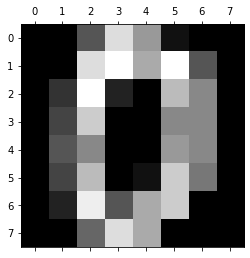

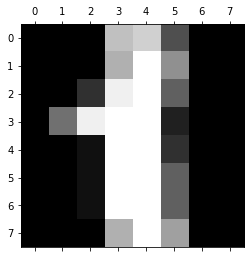

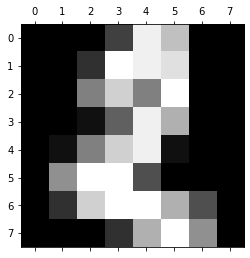

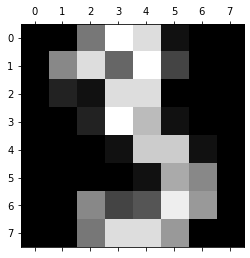

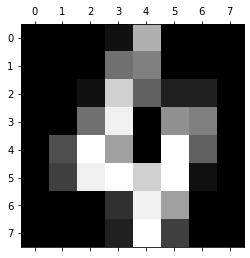

In [58]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

<Figure size 432x288 with 0 Axes>

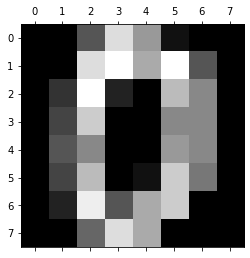

In [59]:
plt.gray()
plt.matshow(digits.images[0])

**checking first 5 target value**

In [60]:
print(digits.target[:5])

[0 1 2 3 4]


# Converting the digists data into pandas dataframe

In [61]:
# importing pandas
import pandas as pd


In [102]:
df = pd.DataFrame(digits.data)
# adding the dependent variable
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


**General Idea of the dataset**

In [77]:
# describing the data
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,15.000000,16.000000,15.000000,14.000000,2.000000,0.000000,0.000000,4.000000,15.000000,12.000000,13.000000,14.00

**Checking null values in the dataset**

In [78]:
temp = pd.DataFrame()
temp['null'] = df.isnull().sum()
temp['dtype'] = df.dtypes
temp

,null,dtype
0,0,float64
1,0,float64
2,0,float64
3,0,float64
4,0,float64
...,...,...
59,0,float64
60,0,float64
61,0,float64
62,0,float64


**Inference**: There is no null values in the dataset and datatypes are also prefect to fed into the model ( sklearn )

**Checking distribution of the Dependent variable (target)**

In [164]:
Y = pd.DataFrame({'Numbers': digits.target})

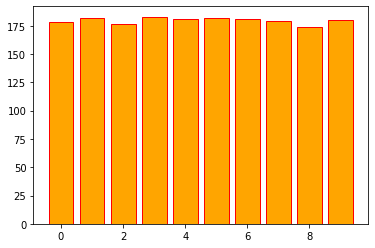

In [168]:
x_bar = Y['Numbers'].value_counts().index.tolist()
plt.bar(x_bar, Y['Numbers'].value_counts(), color='orange', edgecolor='red')
plt.show()

**inference**: The values counts for each digsts is approximately same 

# Scaling the Dataset from 0-1

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [104]:
df_tranform = scaler.fit_transform(df)
df = pd.DataFrame(df_tranform, index=df.index, columns=df.columns)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0,0.0,0.0,0.0,0.8125,0.9375,0.6250,0.9375,0.3125,0.0,0.0,0.1875,0.9375,0.1250,0.0000,0.6875,0.500,0.0,0.0,0.266667,0.7500,0.0000,0.0000,0.5000,0.533333,0.0,0.0,0.357143,0.5000,0.0000,0.0000,0.5625,0.571429,0.0,0.0,0.2500,0.6875,0.0,0.0625,0.750,0.4375,0.0,0.0,0.1250,0.8750,0.3125,0.6250,0.7500,0.0000,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.5625,0.0000,0.0,0.0,0.0000,0.1875,0.9375,1.0000,0.3750,0.000,0.0,0.0,0.466667,0.9375,1.0000,1.0000,0.1250,0.000000,0.0,0.0,0.000000,0.0625,1.0000,1.0000,0.1875,0.000000,0.0,0.0,0.0000,0.0625,1.0,1.0000,0.375,0.0000,0.0,0.0,0.0000,0.0625,1.0000,1.0000,0.3750,0.0000,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0,0.0,0.0,0.0,0.1875,1.0000,0.9375,0.8750,0.0000,0.0,0.0,0.0000,0.5000,0.8125,0.5000,1.0000,0.000,0.0,0.0,0.000000,0.0625,0.3750,0.9375,0.6875,0.000000,0.0,0.0,0.071429,0.5000,0.8125,0.9375,0.0625,0.000000,0.0,0.0,0.5625,1.0000,1.0,0.3125,0.000,0.0000,0.0,0.0,0.1875,0.8125,1.0000,1.0000,0.6875,0.3125,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0,0.0,0.0,0.5,0.8125,0.3750,0.9375,0.2500,0.0000,0.0,0.0,0.1250,0.0625,0.8125,0.8125,0.0000,0.000,0.0,0.0,0.000000,0.1250,0.9375,0.6875,0.0625,0.000000,0.0,0.0,0.000000,0.0000,0.0625,0.7500,0.7500,0.071429,0.0,0.0,0.0000,0.0000,0.0,0.0625,0.625,0.5000,0.0,0.0,0.0000,0.5000,0.2500,0.3125,0.8750,0.5625,0.0,0.0,0.0,0.4375,0.8125,0.8125,0.5625,0.0000,0.0
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0,0.0,0.0,0.0,0.0000,0.4375,0.5000,0.0000,0.0000,0.0,0.0,0.0000,0.0625,0.8125,0.3750,0.1250,0.125,0.0,0.0,0.000000,0.4375,0.9375,0.0000,0.5625,0.533333,0.0,0.0,0.357143,1.0000,0.6250,0.0000,1.0000,0.428571,0.0,0.0,0.2500,0.9375,1.0,0.8125,1.000,0.0625,0.0,0.0,0.0000,0.0000,0.1875,0.9375,0.6250,0.0000,0.0,0.0,0.0,0.0000,0.1250,1.0000,0.2500,0.0000,0.0


# Train & test Split

In [105]:
# importing the function
from sklearn.model_selection import train_test_split

**Getting X (Independent variable) and Y(Dependent variable)**

In [106]:
X = df
Y = pd.DataFrame({'Numbers': digits.target})

**splitting the dataset with 25% in test part**

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y)

**Checking the distribution**

In [108]:
# checking size of X_train and X_test
print(f'X_train-shape = {X_train.shape}')
print(f'X_test-shape = {X_test.shape}')

X_train-shape = (1347, 64)
X_test-shape = (450, 64)


**Checking first 5 distributon of train data**

In [109]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
1525,0.0,0.0,0.0000,0.5625,0.6250,0.0000,0.00,0.0,0.0,0.0,0.1875,1.00,0.2500,0.0000,0.0000,0.0,0.0,0.0000,0.7500,0.5000,0.1250,0.4375,0.00,0.0,0.0,0.266667,1.0000,0.1875,0.8125,0.8125,0.200000,0.0,0.0,1.000000,0.8125,0.5000,1.00,1.0000,0.714286,0.0,0.0,0.8750,1.000,1.0000,1.00,0.5625,0.0625,0.0,0.0,0.125,0.2500,0.5625,1.0000,0.0625,0.000,0.0,0.0,0.0,0.0000,0.5625,0.9375,0.1250,0.00,0.0
1046,0.0,0.0,0.1875,0.9375,1.0000,1.0000,0.75,0.0,0.0,0.0,0.7500,0.75,0.4375,1.0000,0.3750,0.0,0.0,0.2500,0.7500,0.0000,0.5625,0.8125,0.00,0.0,0.0,0.000000,0.0625,0.0625,0.8125,0.4375,0.000000,0.0,0.0,0.000000,0.5000,0.8125,1.00,1.0000,0.428571,0.0,0.0,0.0000,0.750,0.9375,0.75,0.3750,0.0625,0.0,0.0,0.000,0.0000,0.9375,0.3125,0.0000,0.000,0.0,0.0,0.0,0.1875,1.0000,0.1250,0.0000,0.00,0.0
1463,0.0,0.0,0.1875,0.7500,0.5000,0.0625,0.00,0.0,0.0,0.0,0.8750,1.00,1.0000,0.9375,0.0625,0.0,0.0,0.1875,0.9375,0.1250,0.0625,0.7500,0.25,0.0,0.0,0.400000,0.5625,0.0000,0.0000,0.4375,0.533333,0.0,0.0,0.500000,0.5000,0.0000,0.00,0.3125,0.571429,0.0,0.0,0.2500,0.750,0.0000,0.00,0.5625,0.3750,0.0,0.0,0.000,0.9375,0.6875,0.5625,1.0000,0.125,0.0,0.0,0.0,0.1875,0.6875,0.9375,0.4375,0.00,0.0
276,0.0,0.0,0.3125,0.9375,0.7500,0.5000,0.00,0.0,0.0,0.0,0.8125,1.00,0.6250,0.8125,0.1875,0.0,0.0,0.3125,1.0000,0.5625,0.0000,0.5000,0.25,0.0,0.0,0.266667,0.8125,0.0625,0.0000,0.2500,0.533333,0.0,0.0,0.285714,0.5000,0.0000,0.00,0.5000,0.285714,0.0,0.0,0.0625,0.875,0.0000,0.00,0.6875,0.1875,0.0,0.0,0.000,0.7500,0.5625,0.5625,0.9375,0.000,0.0,0.0,0.0,0.2500,0.8750,0.9375,0.2500,0.00,0.0
451,0.0,0.0,0.0000,0.7500,0.9375,0.0625,0.00,0.0,0.0,0.0,0.2500,1.00,0.8125,0.0625,0.0000,0.0,0.0,0.0625,0.8750,0.9375,0.1250,0.0000,0.00,0.0,0.0,0.266667,1.0000,0.9375,0.6250,0.4375,0.000000,0.0,0.0,0.500000,1.0000,1.0000,0.75,1.0000,0.428571,0.0,0.0,0.1875,1.000,0.8125,0.00,1.0000,0.7500,0.0,0.0,0.000,0.6875,1.0000,0.8125,1.0000,0.750,0.0,0.0,0.0,0.0625,0.5625,0.8125,0.7500,0.25,0.0


In [110]:
y_train.head()

,Numbers
1525,4
1046,7
1463,0
276,0
451,6


# Creating Classification model using Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

**Training the model**

In [112]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Calculating the train and test score of model**

In [114]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'train score : {train_score}')
print(f'test score : {test_score}') 

train score : 0.9866369710467706
test score : 0.9777777777777777


**Prediction Score**:0.9777 

**Predicting the test digits**

In [162]:
y_predicted = model.predict(X_test)
y_predicted

array([4, 3, 8, 1, 9, 3, 5, 2, 3, 6, 2, 0, 0, 7, 6, 1, 4, 1, 8, 3, 7, 2,
       3, 8, 0, 7, 5, 4, 9, 4, 2, 6, 5, 9, 7, 2, 3, 8, 8, 7, 7, 1, 7, 3,
       9, 5, 7, 1, 4, 2, 7, 3, 6, 5, 8, 2, 9, 3, 2, 4, 6, 4, 5, 1, 4, 0,
       6, 3, 9, 9, 2, 2, 1, 0, 0, 8, 5, 0, 2, 8, 5, 3, 6, 1, 8, 3, 5, 7,
       7, 8, 4, 4, 6, 8, 2, 3, 5, 1, 7, 3, 6, 6, 2, 9, 0, 7, 2, 8, 3, 9,
       2, 8, 8, 1, 1, 1, 9, 6, 3, 1, 8, 0, 1, 2, 0, 0, 2, 5, 3, 4, 5, 8,
       3, 0, 2, 3, 8, 0, 1, 7, 2, 3, 6, 3, 7, 8, 5, 3, 1, 3, 9, 6, 2, 1,
       8, 9, 2, 7, 4, 8, 7, 7, 0, 8, 7, 8, 5, 4, 9, 5, 9, 0, 2, 5, 3, 6,
       4, 6, 4, 9, 8, 9, 1, 9, 5, 4, 8, 0, 7, 4, 2, 9, 2, 6, 7, 2, 5, 4,
       9, 0, 3, 6, 7, 4, 5, 9, 0, 5, 4, 7, 2, 5, 8, 8, 3, 6, 4, 4, 6, 4,
       3, 8, 1, 5, 0, 5, 9, 5, 6, 8, 7, 2, 7, 4, 6, 8, 8, 6, 7, 7, 6, 6,
       1, 7, 2, 4, 0, 9, 0, 2, 4, 8, 6, 9, 0, 2, 0, 3, 4, 6, 1, 1, 1, 5,
       7, 3, 4, 5, 8, 3, 1, 5, 6, 1, 9, 4, 1, 1, 9, 2, 7, 9, 6, 1, 5, 3,
       7, 5, 6, 0, 3, 9, 6, 6, 0, 5, 0, 3, 1, 3, 4,

# Calculating f1_score of the model

In [123]:
# importing required functions
from sklearn.metrics import f1_score

**Calculating f1_score for each class(0-9)**

In [153]:
score = f1_score(y_test, y_predicted, average=None)
score

array([0.11111111, 0.06382979, 0.11235955, 0.10752688, 0.09195402,
       0.15384615, 0.11235955, 0.08791209, 0.11494253, 0.13483146])

**Plotting the score for each number**

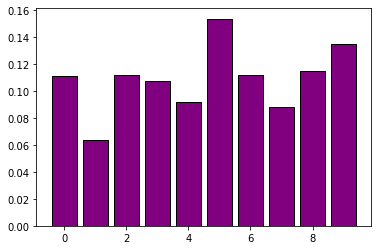

In [154]:
plt.bar(digits.target_names, height=score, color='purple', edgecolor='black')
plt.show()

**Inference**: 5 has maximum f1 score, 1 has lowest f1 socre

**Calculating the overall f1_score ( average f1_score )**

In [135]:
# micro calculation
score_micro = f1_score(y_test, y_predicted, average='micro')
score_micro

0.10888888888888888

In [136]:
# macro calculation
score_macro = f1_score(y_test, y_predicted, average='macro')
score_macro

0.10906731353457162

**Plotting average scores with the individual scores**

In [160]:
colors=['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue', 'green', 'orange']
X = ['0', '1', '2', '3', '4' , '5' , '6', '7' ,'8' ,'9' , 'micro f1', 'macro f1']
scores = list(score)
scores.append(score_micro)
scores.append(score_macro)

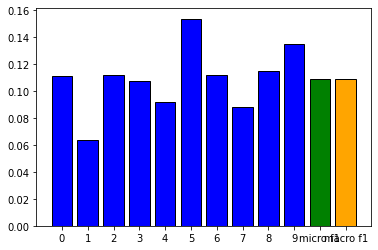

In [161]:
plt.bar(X, height=scores, color=colors, edgecolor='black')
plt.show()

**Inference**: average micro and macro f1_score are approximately same

# Classification Report for the Modle Prediction

In [169]:
# importing the class
from sklearn.metrics import classification_report

In [170]:
report = classification_report(y_test, y_predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      0.96      0.97        46
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        46
           4       1.00      1.00      1.00        45
           5       0.94      0.96      0.95        46
           6       0.98      0.98      0.98        45
           7       1.00      1.00      1.00        45
           8       0.91      0.95      0.93        43
           9       0.98      0.96      0.97        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



**Inference**: 
Here Accuarcy : 98%
Macro average : 98%
weighted avg  : 98%        

# Confusion Metric for the Model Prediction

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 42,  0,  0,  1,  1,  0],
       [ 0,  0,  1,  1,  0, 43,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 40,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 43]])

Text(69.0, 0.5, 'Truth')

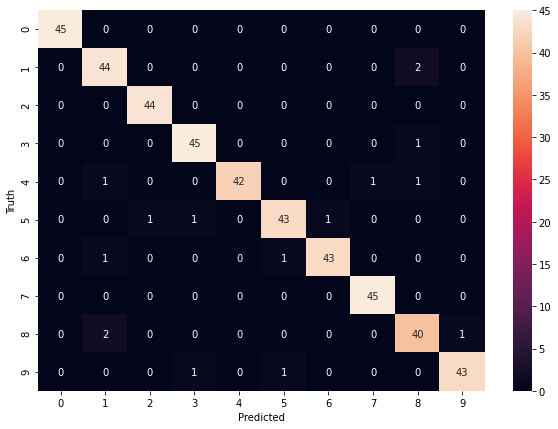

In [96]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Inference**: It is predicting well. The Highest worng prediction is 3 for any Number